In [1]:
import scipy.stats as stats #importing libraries
import pandas as pd

In [2]:
req=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [3]:
req.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
for col in req.columns: 
    print(col)

Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Region
School Code
School Phone Number
School Address
School City
School State
School Zip
School Not Found
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


In [5]:
del req['School Not Found']
del req['School or Citywide Complaint']
del req['Vehicle Type']
del req['Taxi Company Borough']
del req['Taxi Pick Up Location']
del req['Bridge Highway Name']
del req['Bridge Highway Direction']
del req['Garage Lot Name']
del req['School Phone Number']
del req['School Address']
del req['School Region']
del req['School Code']
del req['School Name']
del req['School Number']
del req['School City']
del req['Park Facility Name']
del req['Unique Key']
del req['Agency']
del req['Agency Name']
del req['Incident Zip']
del req['Incident Address']
del req['Street Name']
del req['Cross Street 1']
del req['Cross Street 2']
del req['Intersection Street 1']
del req['Intersection Street 2']
del req['Address Type']
del req['Landmark']
del req['Facility Type']
del req['Status']
del req['Resolution Description']
del req['X Coordinate (State Plane)']
del req['Y Coordinate (State Plane)']
del req['Road Ramp']
del req['Bridge Highway Segment']
del req['School State']
del req['School Zip']
del req['Latitude']
del req['Longitude']
del req['Park Borough']
del req['Ferry Direction']
del req['Ferry Terminal Name']

In [6]:
req=req.dropna(subset=['Closed Date'])
req=req.dropna(subset=['Descriptor'])
req=req.dropna(subset=['Location Type'])
req=req.dropna(subset=['Location'])

In [7]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location
0,12/31/2015 11:59:45 PM,01-01-16 0:55,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-16 7:59,01-01-16 0:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01-01-16 1:26,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-16 7:59,01-01-16 1:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01-01-16 4:51,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-16 7:59,01-01-16 4:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01-01-16 7:43,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-16 7:57,01-01-16 7:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01-01-16 3:24,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-16 7:56,01-01-16 3:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [8]:

req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1665
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Created Date                    1622 non-null   object
 1   Closed Date                     1622 non-null   object
 2   Complaint Type                  1622 non-null   object
 3   Descriptor                      1622 non-null   object
 4   Location Type                   1622 non-null   object
 5   City                            1622 non-null   object
 6   Due Date                        1622 non-null   object
 7   Resolution Action Updated Date  1622 non-null   object
 8   Community Board                 1622 non-null   object
 9   Borough                         1622 non-null   object
 10  Location                        1622 non-null   object
dtypes: object(11)
memory usage: 152.1+ KB


In [9]:
req['Created Date']=pd.to_datetime(req['Created Date'])

In [10]:
req['Created Date']

0      2015-12-31 23:59:45
1      2015-12-31 23:59:44
2      2015-12-31 23:59:29
3      2015-12-31 23:57:46
4      2015-12-31 23:56:58
               ...        
1661   2015-12-30 04:03:57
1662   2015-12-30 04:02:30
1663   2015-12-30 03:51:43
1664   2015-12-30 03:49:33
1665   2015-12-30 03:34:52
Name: Created Date, Length: 1622, dtype: datetime64[ns]

In [11]:

req['Closed Date']=pd.to_datetime(req['Closed Date'])

In [12]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-16 7:59,01-01-16 0:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-16 7:59,01-01-16 1:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-16 7:59,01-01-16 4:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-16 7:57,01-01-16 7:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-16 7:56,01-01-16 3:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [13]:
import numpy as np

In [14]:
req['Request_Closing_Time']=req['Closed Date']-req['Created Date']

In [15]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-16 7:59,01-01-16 0:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-16 7:59,01-01-16 1:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-16 7:59,01-01-16 4:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-16 7:57,01-01-16 7:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-16 7:56,01-01-16 3:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [16]:
r=pd.DataFrame(req['Complaint Type'])
s=pd.DataFrame(req['Request_Closing_Time'])
t=pd.concat((r,s),axis=1)
d=pd.DataFrame(req['Location'])
e=pd.DataFrame(req['Location Type'])
f=pd.concat((d,e),axis=1)
g=pd.concat((t,f),axis=1)
h=g.sort_values(by ='Request_Closing_Time' , ascending=False)
print("Sorted complaint types based on the average ‘Request_Closing_Time’ : ")
print(h)

Sorted complaint types based on the average ‘Request_Closing_Time’ : 
               Complaint Type  ...     Location Type
24           Blocked Driveway  ...   Street/Sidewalk
1662  Noise - Street/Sidewalk  ...   Street/Sidewalk
1652  Noise - Street/Sidewalk  ...   Street/Sidewalk
1507          Noise - Vehicle  ...   Street/Sidewalk
1504          Illegal Parking  ...   Street/Sidewalk
...                       ...  ...               ...
132           Illegal Parking  ...   Street/Sidewalk
41         Noise - Commercial  ...  Store/Commercial
234           Illegal Parking  ...   Street/Sidewalk
546                   Vending  ...   Street/Sidewalk
596                   Vending  ...   Street/Sidewalk

[1622 rows x 4 columns]


In [17]:
sorted_data=pd.DataFrame(h)                
sorted_data

,Complaint Type,Request_Closing_Time,Location,Location Type
24,Blocked Driveway,2 days 16:50:20,"(40.87006255915965, -73.86432172842636)",Street/Sidewalk
1662,Noise - Street/Sidewalk,1 days 13:03:24,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1652,Noise - Street/Sidewalk,1 days 12:08:00,"(40.86588098496191, -73.92631354584884)",Street/Sidewalk
1507,Noise - Vehicle,1 days 07:14:08,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
1504,Illegal Parking,1 days 07:09:20,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
...,...,...,...,...
132,Illegal Parking,0 days 00:04:11,"(40.6803260972469, -73.88090678528529)",Street/Sidewalk
41,Noise - Commercial,0 days 00:04:01,"(40.68186974794423, -73.94937196628798)",Store/Commercial
234,Illegal Parking,0 days 00:03:50,"(40.70299176586782, -73.8776636180638)",Street/Sidewalk
546,Vending,0 days 00:03:38,"(40.723612285331214, -73.99832601337529)",Street/Sidewalk


In [18]:

sorted_data.head()

,Complaint Type,Request_Closing_Time,Location,Location Type
24,Blocked Driveway,2 days 16:50:20,"(40.87006255915965, -73.86432172842636)",Street/Sidewalk
1662,Noise - Street/Sidewalk,1 days 13:03:24,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1652,Noise - Street/Sidewalk,1 days 12:08:00,"(40.86588098496191, -73.92631354584884)",Street/Sidewalk
1507,Noise - Vehicle,1 days 07:14:08,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
1504,Illegal Parking,1 days 07:09:20,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk


In [19]:
sorted_data.tail()

,Complaint Type,Request_Closing_Time,Location,Location Type
132,Illegal Parking,0 days 00:04:11,"(40.6803260972469, -73.88090678528529)",Street/Sidewalk
41,Noise - Commercial,0 days 00:04:01,"(40.68186974794423, -73.94937196628798)",Store/Commercial
234,Illegal Parking,0 days 00:03:50,"(40.70299176586782, -73.8776636180638)",Street/Sidewalk
546,Vending,0 days 00:03:38,"(40.723612285331214, -73.99832601337529)",Street/Sidewalk
596,Vending,0 days 00:03:29,"(40.72338721781093, -73.99851722806198)",Street/Sidewalk


In [20]:
req['Request_Closing_Time']=req['Request_Closing_Time'].astype('timedelta64[h]')

In [21]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-16 7:59,01-01-16 0:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)",0.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-16 7:59,01-01-16 1:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)",1.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-16 7:59,01-01-16 4:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)",4.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-16 7:57,01-01-16 7:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)",7.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-16 7:56,01-01-16 3:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)",3.0


In [22]:

req.shape

(1622, 12)

In [23]:
req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1622 entries, 0 to 1665
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Created Date                    1622 non-null   datetime64[ns]
 1   Closed Date                     1622 non-null   datetime64[ns]
 2   Complaint Type                  1622 non-null   object        
 3   Descriptor                      1622 non-null   object        
 4   Location Type                   1622 non-null   object        
 5   City                            1622 non-null   object        
 6   Due Date                        1622 non-null   object        
 7   Resolution Action Updated Date  1622 non-null   object        
 8   Community Board                 1622 non-null   object        
 9   Borough                         1622 non-null   object        
 10  Location                        1622 non-null   object        
 11  Requ

In [24]:
req['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park'], dtype=object)

In [25]:

a=req['Complaint Type'].value_counts()  
a

Blocked Driveway            571
Illegal Parking             453
Noise - Commercial          188
Derelict Vehicle            114
Noise - Street/Sidewalk     103
Vending                      61
Animal Abuse                 45
Noise - Vehicle              41
Traffic                      23
Posting Advertisement        10
Drinking                      7
Noise - House of Worship      3
Noise - Park                  3
Name: Complaint Type, dtype: int64

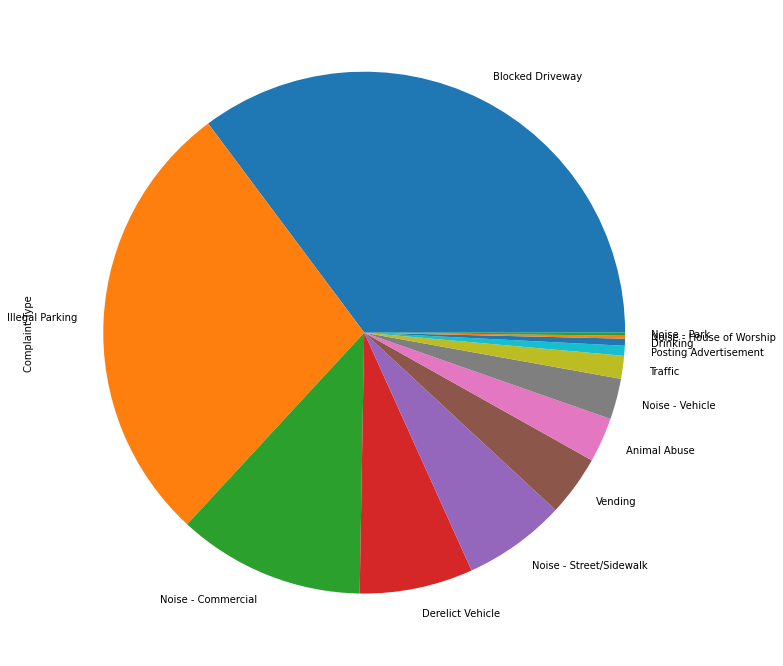

In [26]:
a.plot.pie(figsize=(12,12))

In [27]:
b=req['City'].value_counts()
b

BROOKLYN               540
NEW YORK               306
BRONX                  230
STATEN ISLAND           76
RIDGEWOOD               41
JAMAICA                 41
ASTORIA                 36
FLUSHING                29
CORONA                  29
ELMHURST                26
WOODSIDE                22
OZONE PARK              18
SOUTH OZONE PARK        17
WOODHAVEN               17
RICHMOND HILL           15
MASPETH                 15
FOREST HILLS            15
QUEENS VILLAGE          14
MIDDLE VILLAGE          14
SOUTH RICHMOND HILL     13
EAST ELMHURST           11
JACKSON HEIGHTS         10
HOWARD BEACH            10
SAINT ALBANS             9
FRESH MEADOWS            9
BAYSIDE                  7
KEW GARDENS              7
LONG ISLAND CITY         6
HOLLIS                   6
REGO PARK                5
COLLEGE POINT            4
ROSEDALE                 4
FAR ROCKAWAY             4
SPRINGFIELD GARDENS      4
LITTLE NECK              3
OAKLAND GARDENS          2
ROCKAWAY PARK            2
S

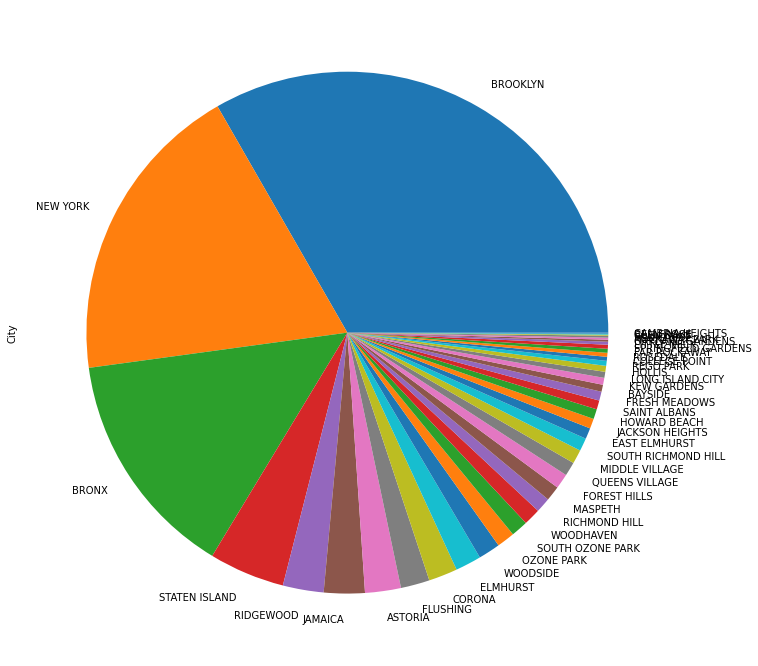

In [28]:
b.plot.pie(figsize=(12,12))

In [29]:
c=req['Location Type'].value_counts()
c

Street/Sidewalk               1375
Store/Commercial               134
Club/Bar/Restaurant             68
Residential Building/House      31
Residential Building             4
House of Worship                 3
Park/Playground                  3
Vacant Lot                       2
House and Store                  2
Name: Location Type, dtype: int64

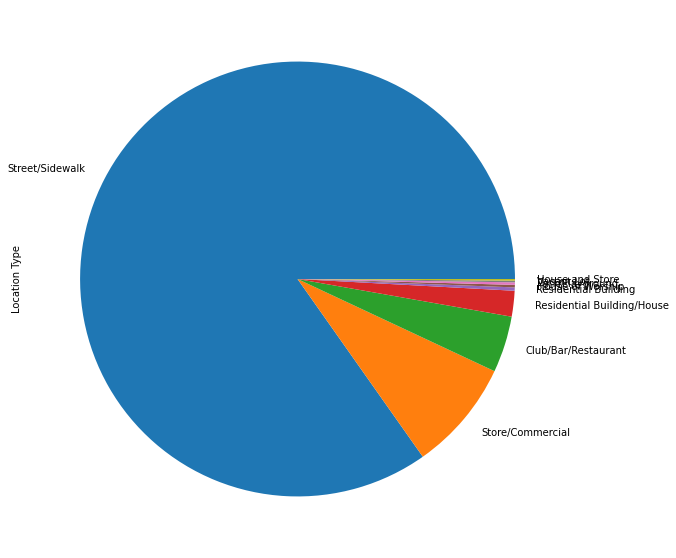

In [30]:
c.plot.pie(figsize=(10,10))

In [31]:
dp=req['Descriptor'].value_counts()
dp

No Access                         430
Loud Music/Party                  198
Partial Access                    141
Posted Parking Sign Violation     137
With License Plate                114
Blocked Hydrant                   105
Blocked Sidewalk                   71
Loud Talking                       66
Commercial Overnight Parking       51
In Prohibited Area                 51
Double Parked Blocking Vehicle     40
Double Parked Blocking Traffic     31
Banging/Pounding                   23
Car/Truck Music                    18
Engine Idling                      17
Neglected                          16
Car/Truck Horn                     15
Congestion/Gridlock                14
Other (complaint details)          14
Unlicensed                         10
Vehicle                            10
Overnight Commercial Storage       10
Truck Route Violation               8
Unauthorized Bus Layover            7
Tortured                            7
No Shelter                          6
After Hours 

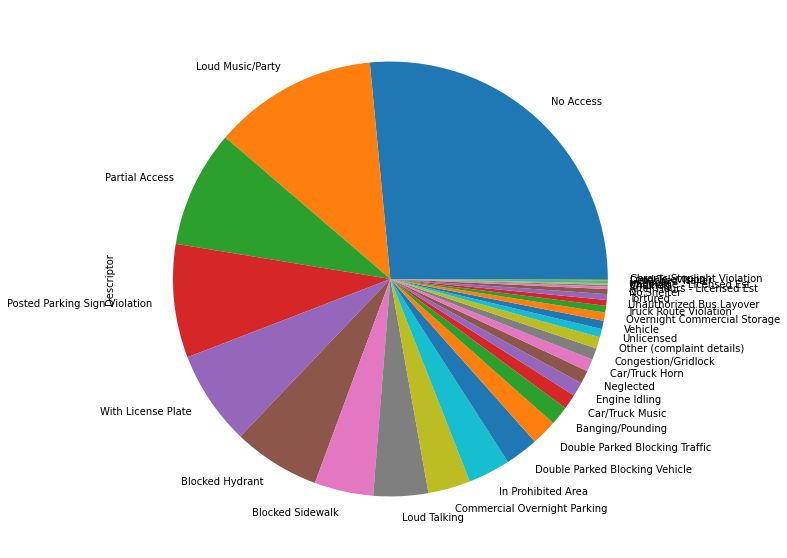

In [32]:
dp.plot.pie(figsize=(10,10))  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


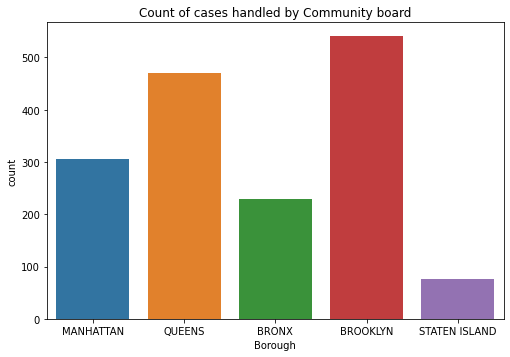

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.title('Count of cases handled by Community board')
sns.countplot(req['Borough'])

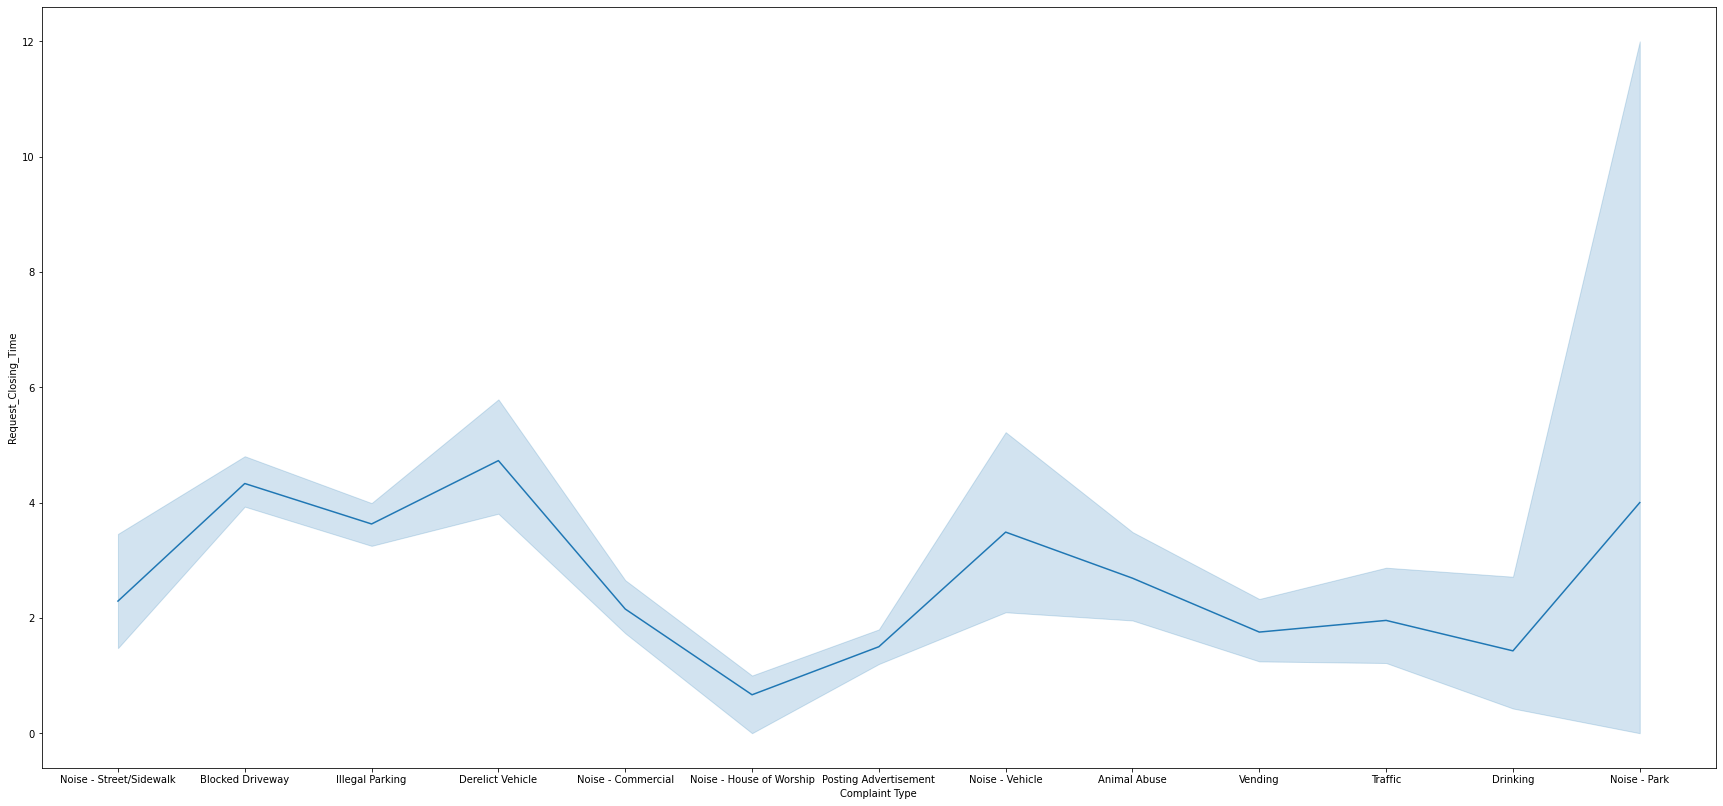

In [34]:
plt.figure(figsize=(30,14))                                                                
sns.lineplot(x = req['Complaint Type'], y = req['Request_Closing_Time'])

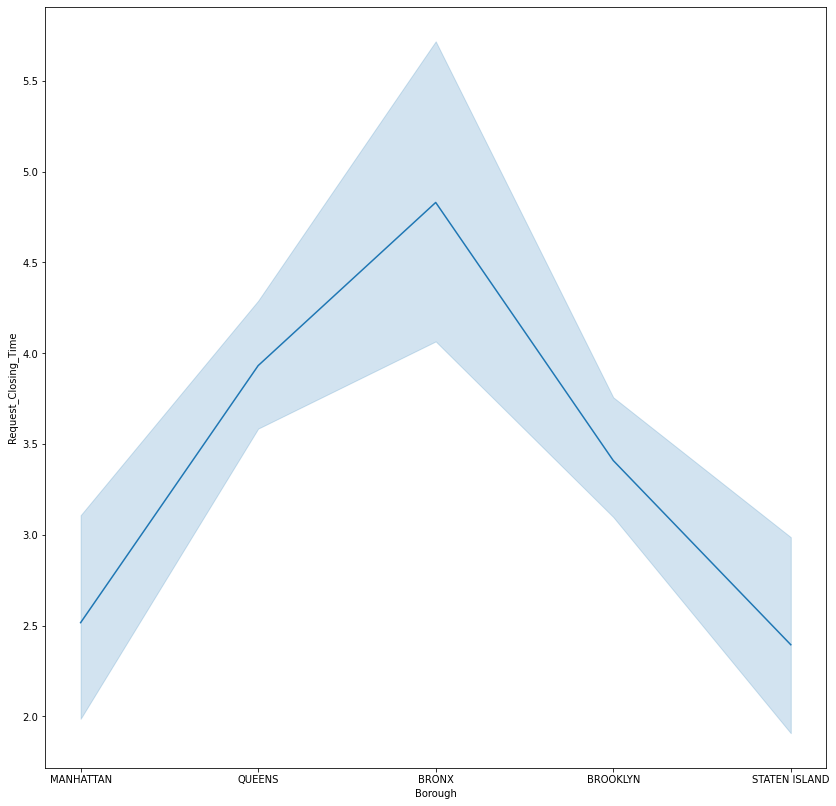

In [35]:
plt.figure(figsize=(14,14))                                                                
sns.lineplot(x = req['Borough'], y = req['Request_Closing_Time'])

<Figure size 3600x1008 with 0 Axes>

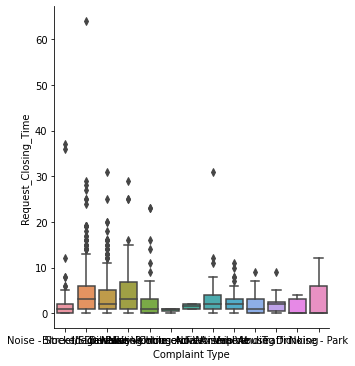

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,14))
sns.catplot(x="Complaint Type", y="Request_Closing_Time", kind="box", data=req)

<Figure size 1008x1008 with 0 Axes>

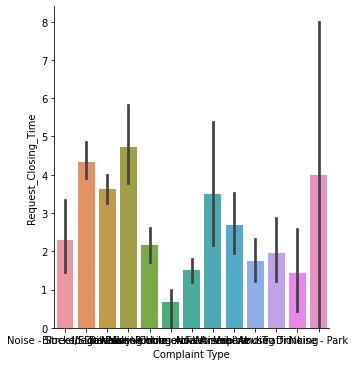

In [37]:
plt.figure(figsize=(14,14))
sns.catplot(x="Complaint Type", y="Request_Closing_Time",  kind="bar", data=req)

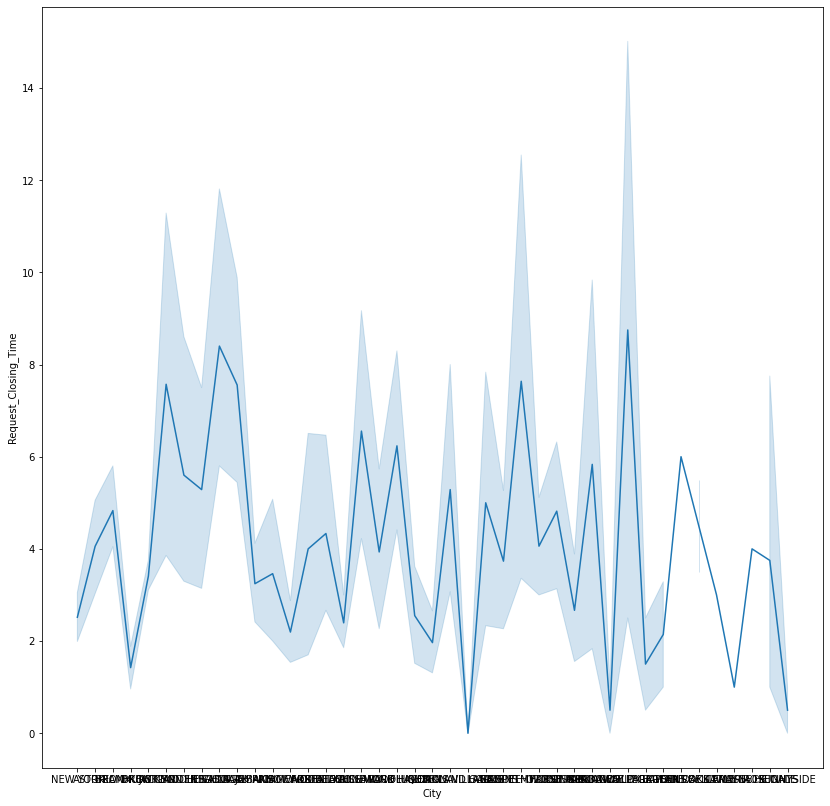

In [38]:
plt.figure(figsize=(14,14))                                                                
sns.lineplot(x = req['City'], y = req['Request_Closing_Time'])

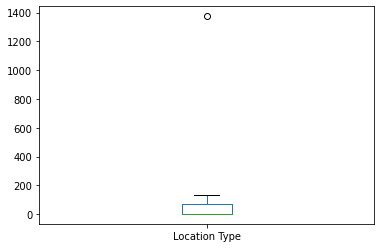

In [39]:
c.plot.box()

In [40]:

r=pd.DataFrame(req['Complaint Type'])
u=pd.DataFrame(req['Request_Closing_Time'])
v=pd.concat((r,u),axis=1)
v

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,0.0
1,Blocked Driveway,1.0
2,Blocked Driveway,4.0
3,Illegal Parking,7.0
4,Illegal Parking,3.0
...,...,...
1661,Blocked Driveway,11.0
1662,Noise - Street/Sidewalk,37.0
1663,Noise - Commercial,2.0
1664,Noise - Street/Sidewalk,0.0


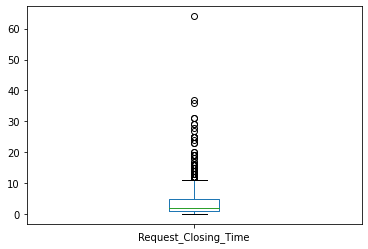

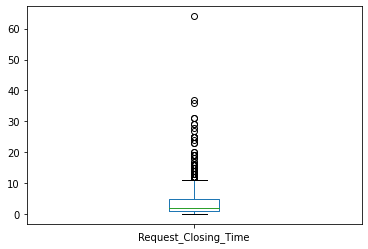

In [41]:

v.plot.box()

In [43]:
j=pd.DataFrame(req['Complaint Type'])
k=pd.DataFrame(req['Descriptor'])
l=pd.concat((j,k),axis=1)
l

,Complaint Type,Descriptor
0,Noise - Street/Sidewalk,Loud Music/Party
1,Blocked Driveway,No Access
2,Blocked Driveway,No Access
3,Illegal Parking,Commercial Overnight Parking
4,Illegal Parking,Blocked Sidewalk
...,...,...
1661,Blocked Driveway,No Access
1662,Noise - Street/Sidewalk,Loud Music/Party
1663,Noise - Commercial,Loud Music/Party
1664,Noise - Street/Sidewalk,Loud Talking


In [44]:
rep_table=l.groupby(['Complaint Type','Descriptor'])
print("\\Descriptors of particular Complaint Type\\")
rep_table.first()

\Descriptors of particular Complaint Type\


Empty DataFrame
Columns: []
Index: [(Animal Abuse, Chained), (Animal Abuse, Neglected), (Animal Abuse, No Shelter), (Animal Abuse, Other (complaint details)), (Animal Abuse, Tortured), (Blocked Driveway, No Access), (Blocked Driveway, Partial Access), (Derelict Vehicle, With License Plate), (Drinking, After Hours - Licensed Est), (Drinking, In Public), (Drinking, Underage - Licensed Est), (Illegal Parking, Blocked Hydrant), (Illegal Parking, Blocked Sidewalk), (Illegal Parking, Commercial Overnight Parking), (Illegal Parking, Detached Trailer), (Illegal Parking, Double Parked Blocking Traffic), (Illegal Parking, Double Parked Blocking Vehicle), (Illegal Parking, Overnight Commercial Storage), (Illegal Parking, Posted Parking Sign Violation), (Illegal Parking, Unauthorized Bus Layover), (Noise - Commercial, Banging/Pounding), (Noise - Commercial, Car/Truck Horn), (Noise - Commercial, Car/Truck Music), (Noise - Commercial, Loud Music/Party), (Noise - Commercial, Loud Talking), (Noise - Commercial, Loud Television), (Noise - House of Worship, Banging/Pounding), (Noise - House of Worship, Loud Music/Party), (Noise - Park, Loud Music/Party), (Noise - Street/Sidewalk, Loud Music/Party), (Noise - Street/Sidewalk, Loud Talking), (Noise - Vehicle, Car/Truck Horn), (Noise - Vehicle, Car/Truck Music), (Noise - Vehicle, Engine Idling), (Posting Advertisement, Vehicle), (Traffic, Chronic Stoplight Violation), (Traffic, Congestion/Gridlock), (Traffic, Truck Route Violation), (Vending, In Prohibited Area), (Vending, Unlicensed)]

In [45]:

d=pd.DataFrame(req['Location'])
d

,Location
0,"(40.86568153633767, -73.92350095571744)"
1,"(40.775945312321085, -73.91509393898605)"
2,"(40.870324522111424, -73.88852464418646)"
3,"(40.83599404683083, -73.82837939584206)"
4,"(40.733059618956815, -73.87416975810375)"
...,...
1661,"(40.687204133979556, -73.860997895954)"
1662,"(40.86024195513732, -73.92842019162248)"
1663,"(40.70810404540373, -73.94306883695855)"
1664,"(40.82465431514079, -73.93835866654024)"


In [46]:
e=pd.DataFrame(req['Location Type'])
e

,Location Type
0,Street/Sidewalk
1,Street/Sidewalk
2,Street/Sidewalk
3,Street/Sidewalk
4,Street/Sidewalk
...,...
1661,Street/Sidewalk
1662,Street/Sidewalk
1663,Club/Bar/Restaurant
1664,Street/Sidewalk


In [47]:

f=pd.concat((d,e),axis=1)
f

,Location,Location Type
0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk
1,"(40.775945312321085, -73.91509393898605)",Street/Sidewalk
2,"(40.870324522111424, -73.88852464418646)",Street/Sidewalk
3,"(40.83599404683083, -73.82837939584206)",Street/Sidewalk
4,"(40.733059618956815, -73.87416975810375)",Street/Sidewalk
...,...,...
1661,"(40.687204133979556, -73.860997895954)",Street/Sidewalk
1662,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1663,"(40.70810404540373, -73.94306883695855)",Club/Bar/Restaurant
1664,"(40.82465431514079, -73.93835866654024)",Street/Sidewalk


In [48]:
g=pd.concat((v,f),axis=1)
g

,Complaint Type,Request_Closing_Time,Location,Location Type
0,Noise - Street/Sidewalk,0.0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk
1,Blocked Driveway,1.0,"(40.775945312321085, -73.91509393898605)",Street/Sidewalk
2,Blocked Driveway,4.0,"(40.870324522111424, -73.88852464418646)",Street/Sidewalk
3,Illegal Parking,7.0,"(40.83599404683083, -73.82837939584206)",Street/Sidewalk
4,Illegal Parking,3.0,"(40.733059618956815, -73.87416975810375)",Street/Sidewalk
...,...,...,...,...
1661,Blocked Driveway,11.0,"(40.687204133979556, -73.860997895954)",Street/Sidewalk
1662,Noise - Street/Sidewalk,37.0,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1663,Noise - Commercial,2.0,"(40.70810404540373, -73.94306883695855)",Club/Bar/Restaurant
1664,Noise - Street/Sidewalk,0.0,"(40.82465431514079, -73.93835866654024)",Street/Sidewalk


In [49]:
w=g.sort_values(by ='Request_Closing_Time' , ascending=False)
print("Sorted complaint types based on the average ‘Request_Closing_Time’- timedelta64[h] type : ")
print(w)

Sorted complaint types based on the average ‘Request_Closing_Time’- timedelta64[h] type : 
               Complaint Type  ...    Location Type
24           Blocked Driveway  ...  Street/Sidewalk
1662  Noise - Street/Sidewalk  ...  Street/Sidewalk
1652  Noise - Street/Sidewalk  ...  Street/Sidewalk
1507          Noise - Vehicle  ...  Street/Sidewalk
1504          Illegal Parking  ...  Street/Sidewalk
...                       ...  ...              ...
557                   Vending  ...  Street/Sidewalk
561                   Vending  ...  Street/Sidewalk
571                   Vending  ...  Street/Sidewalk
572                   Vending  ...  Street/Sidewalk
0     Noise - Street/Sidewalk  ...  Street/Sidewalk

[1622 rows x 4 columns]


In [50]:
sorted_data_timedelta=pd.DataFrame(w)               
sorted_data_timedelta

,Complaint Type,Request_Closing_Time,Location,Location Type
24,Blocked Driveway,64.0,"(40.87006255915965, -73.86432172842636)",Street/Sidewalk
1662,Noise - Street/Sidewalk,37.0,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1652,Noise - Street/Sidewalk,36.0,"(40.86588098496191, -73.92631354584884)",Street/Sidewalk
1507,Noise - Vehicle,31.0,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
1504,Illegal Parking,31.0,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
...,...,...,...,...
557,Vending,0.0,"(40.723612285331214, -73.99832601337529)",Street/Sidewalk
561,Vending,0.0,"(40.722604968387486, -73.99917745003964)",Street/Sidewalk
571,Vending,0.0,"(40.72338721781093, -73.99851722806198)",Street/Sidewalk
572,Vending,0.0,"(40.722604968387486, -73.99917745003964)",Street/Sidewalk


In [51]:
sorted_data_timedelta.head()

,Complaint Type,Request_Closing_Time,Location,Location Type
24,Blocked Driveway,64.0,"(40.87006255915965, -73.86432172842636)",Street/Sidewalk
1662,Noise - Street/Sidewalk,37.0,"(40.86024195513732, -73.92842019162248)",Street/Sidewalk
1652,Noise - Street/Sidewalk,36.0,"(40.86588098496191, -73.92631354584884)",Street/Sidewalk
1507,Noise - Vehicle,31.0,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk
1504,Illegal Parking,31.0,"(40.86903400477784, -73.91727461539875)",Street/Sidewalk


In [52]:
sorted_data_timedelta.tail()

,Complaint Type,Request_Closing_Time,Location,Location Type
557,Vending,0.0,"(40.723612285331214, -73.99832601337529)",Street/Sidewalk
561,Vending,0.0,"(40.722604968387486, -73.99917745003964)",Street/Sidewalk
571,Vending,0.0,"(40.72338721781093, -73.99851722806198)",Street/Sidewalk
572,Vending,0.0,"(40.722604968387486, -73.99917745003964)",Street/Sidewalk
0,Noise - Street/Sidewalk,0.0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk


In [53]:
n=sorted_data_timedelta.groupby(['Location'])
grp=n.first()
grp

,Complaint Type,Request_Closing_Time,Location Type
Location,,,
"(40.511738292044555, -74.25139586276529)",Illegal Parking,9.0,Street/Sidewalk
"(40.51346042519412, -74.24452241831678)",Illegal Parking,3.0,Street/Sidewalk
"(40.534524981535355, -74.21826912509813)",Illegal Parking,3.0,Street/Sidewalk
"(40.5366306678224, -74.14945307054214)",Illegal Parking,1.0,Street/Sidewalk
"(40.541547488661976, -74.14666129786113)",Noise - Commercial,9.0,Club/Bar/Restaurant
...,...,...,...
"(40.90451805844007, -73.90740156002674)",Illegal Parking,1.0,Street/Sidewalk
"(40.90545215435259, -73.84645447878691)",Blocked Driveway,5.0,Street/Sidewalk
"(40.9058902172534, -73.85192694069899)",Blocked Driveway,9.0,Street/Sidewalk


In [54]:
desc=grp.sort_values(by ='Request_Closing_Time' , ascending=False)
print(desc)

                                                   Complaint Type  ...        Location Type
Location                                                           ...                     
(40.87006255915965, -73.86432172842636)          Blocked Driveway  ...      Street/Sidewalk
(40.86024195513732, -73.92842019162248)   Noise - Street/Sidewalk  ...      Street/Sidewalk
(40.86588098496191, -73.92631354584884)   Noise - Street/Sidewalk  ...      Street/Sidewalk
(40.86903400477784, -73.91727461539875)           Noise - Vehicle  ...      Street/Sidewalk
(40.88657631873719, -73.85663172949411)          Blocked Driveway  ...      Street/Sidewalk
...                                                           ...  ...                  ...
(40.69835432325958, -73.82006399847626)                  Drinking  ...  Club/Bar/Restaurant
(40.826101709196, -73.94566339279595)    Noise - House of Worship  ...     House of Worship
(40.82827829711324, -73.90703069080907)           Illegal Parking  ...      Stre

In [55]:
grp_loc=pd.DataFrame(desc)

In [56]:
grp_loc   

,Complaint Type,Request_Closing_Time,Location Type
Location,,,
"(40.87006255915965, -73.86432172842636)",Blocked Driveway,64.0,Street/Sidewalk
"(40.86024195513732, -73.92842019162248)",Noise - Street/Sidewalk,37.0,Street/Sidewalk
"(40.86588098496191, -73.92631354584884)",Noise - Street/Sidewalk,36.0,Street/Sidewalk
"(40.86903400477784, -73.91727461539875)",Noise - Vehicle,31.0,Street/Sidewalk
"(40.88657631873719, -73.85663172949411)",Blocked Driveway,29.0,Street/Sidewalk
...,...,...,...
"(40.69835432325958, -73.82006399847626)",Drinking,0.0,Club/Bar/Restaurant
"(40.826101709196, -73.94566339279595)",Noise - House of Worship,0.0,House of Worship
"(40.82827829711324, -73.90703069080907)",Illegal Parking,0.0,Street/Sidewalk


In [57]:
import scipy.stats as stats
import pandas as pd

In [58]:
pd.set_option('display.max_rows', None)
ann=v.groupby(['Complaint Type','Request_Closing_Time'])
df=ann.first()
df

Empty DataFrame
Columns: []
Index: [(Animal Abuse, 0.0), (Animal Abuse, 1.0), (Animal Abuse, 2.0), (Animal Abuse, 3.0), (Animal Abuse, 4.0), (Animal Abuse, 6.0), (Animal Abuse, 7.0), (Animal Abuse, 8.0), (Animal Abuse, 10.0), (Animal Abuse, 11.0), (Blocked Driveway, 0.0), (Blocked Driveway, 1.0), (Blocked Driveway, 2.0), (Blocked Driveway, 3.0), (Blocked Driveway, 4.0), (Blocked Driveway, 5.0), (Blocked Driveway, 6.0), (Blocked Driveway, 7.0), (Blocked Driveway, 8.0), (Blocked Driveway, 9.0), (Blocked Driveway, 10.0), (Blocked Driveway, 11.0), (Blocked Driveway, 12.0), (Blocked Driveway, 13.0), (Blocked Driveway, 14.0), (Blocked Driveway, 15.0), (Blocked Driveway, 16.0), (Blocked Driveway, 17.0), (Blocked Driveway, 18.0), (Blocked Driveway, 19.0), (Blocked Driveway, 24.0), (Blocked Driveway, 25.0), (Blocked Driveway, 27.0), (Blocked Driveway, 28.0), (Blocked Driveway, 29.0), (Blocked Driveway, 64.0), (Derelict Vehicle, 0.0), (Derelict Vehicle, 1.0), (Derelict Vehicle, 2.0), (Derelict Vehicle, 3.0), (Derelict Vehicle, 4.0), (Derelict Vehicle, 5.0), (Derelict Vehicle, 6.0), (Derelict Vehicle, 7.0), (Derelict Vehicle, 8.0), (Derelict Vehicle, 9.0), (Derelict Vehicle, 10.0), (Derelict Vehicle, 11.0), (Derelict Vehicle, 12.0), (Derelict Vehicle, 13.0), (Derelict Vehicle, 14.0), (Derelict Vehicle, 15.0), (Derelict Vehicle, 16.0), (Derelict Vehicle, 25.0), (Derelict Vehicle, 29.0), (Drinking, 0.0), (Drinking, 3.0), (Drinking, 4.0), (Illegal Parking, 0.0), (Illegal Parking, 1.0), (Illegal Parking, 2.0), (Illegal Parking, 3.0), (Illegal Parking, 4.0), (Illegal Parking, 5.0), (Illegal Parking, 6.0), (Illegal Parking, 7.0), (Illegal Parking, 8.0), (Illegal Parking, 9.0), (Illegal Parking, 10.0), (Illegal Parking, 11.0), (Illegal Parking, 12.0), (Illegal Parking, 13.0), (Illegal Parking, 14.0), (Illegal Parking, 15.0), (Illegal Parking, 16.0), (Illegal Parking, 18.0), (Illegal Parking, 20.0), (Illegal Parking, 25.0), (Illegal Parking, 31.0), (Noise - Commercial, 0.0), (Noise - Commercial, 1.0), (Noise - Commercial, 2.0), (Noise - Commercial, 3.0), (Noise - Commercial, 4.0), (Noise - Commercial, 5.0), (Noise - Commercial, 6.0), (Noise - Commercial, 7.0), (Noise - Commercial, 9.0), (Noise - Commercial, 11.0), (Noise - Commercial, 14.0), (Noise - Commercial, 16.0), (Noise - Commercial, 23.0), (Noise - House of Worship, 0.0), (Noise - House of Worship, 1.0), (Noise - Park, 0.0), (Noise - Park, 12.0), (Noise - Street/Sidewalk, 0.0), (Noise - Street/Sidewalk, 1.0), (Noise - Street/Sidewalk, 2.0), (Noise - Street/Sidewalk, 3.0), ...]

In [59]:
Animal_Abuse=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,40.0,41.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,56.0,65.0,71.0,76.0,77.0,78.0,79.0,82.0,108.0,126.0,519.0]


In [60]:
Animal_in_a_Park=[336.0]

In [61]:
Blocked_Driveway=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,86.0,88.0,90.0,95.0,96.0,100.0,103.0,104.0,107.0,121.0,134.0,141.0,146.0,148.0]

In [62]:
Derelict_Vehicle=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,76.0,77.0,78.0,79.0,80.0,81.0,83.0,85.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,97.0,100.0,101.0,105.0,107.0,111.0,115.0,117.0,118.0,120.0,121.0,127.0,141.0,142.0,161.0,162.0,169.0,192.0,200.0,223.0]

In [63]:
Disorderly_Youth=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,15.0,16.0,17.0,18.0,19.0,20.0,28.0]

In [64]:
Drinking=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,28.0,29.0,33.0,36.0,44.0,59.0,61.0,94.0]

In [65]:
Graffiti=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,20.0,22.0,25.0,26.0,39.0,53.0,54.0]

In [66]:
Illegal_Parking=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,64.0,65.0,66.0,67.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,83.0,84.0,87.0,89.0,92.0,97.0,98.0,100.0,106.0,114.0,123.0,125.0,126.0,146.0,147.0,152.0,160.0,164.0,577.0]

In [67]:
Noise_Commercial=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,54.0,55.0,57.0,58.0,59.0,63.0,67.0,73.0,81.0,106.0,124.0,125.0,126.0]

In [68]:
Noise_House_of_Worship=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0,18.0,19.0,20.0,21.0,27.0,34.0,42.0,48.0,49.0]

In [69]:
Noise_Park=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,32.0,33.0,34.0,35.0,48.0,52.0,53.0,57.0]

In [70]:
Noise_Street_Sidewalk=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,58.0,59.0,60.0,61.0,68.0,73.0,75.0,76.0,77.0,120.0,124.0,125.0,126.0,145.0,146.0,147.0,592.0]

In [71]:
Noise_Vehicle=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,61.0,68.0,69.0,84.0,101.0,119.0,147.0]

In [72]:
Posting_Advertisement=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,25.0]

In [73]:
Traffic=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,24.0,25.0,26.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,39.0,44.0,46.0,47.0,50.0,51.0,56.0,57.0,60.0]

In [74]:
Vending=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,25.0,26.0,27.0,28.0,30.0,31.0,32.0,35.0,36.0,37.0,52.0,64.0,65.0,66.0,76.0]

In [75]:
stats.f_oneway(Animal_Abuse,Animal_in_a_Park,Blocked_Driveway,Derelict_Vehicle,Disorderly_Youth,Drinking,Graffiti,Illegal_Parking,Noise_Commercial,Noise_House_of_Worship,Noise_Park,Noise_Street_Sidewalk,Noise_Vehicle,Posting_Advertisement,Traffic,Vending)


F_onewayResult(statistic=10.235448309314435, pvalue=1.2203389179177725e-22)

In [76]:
Animal_Abuse = pd.Series(Animal_Abuse)
Animal_Abuse.mean()

42.666666666666664

In [77]:
Animal_in_a_Park = pd.Series(Animal_in_a_Park)
Animal_in_a_Park.mean()

336.0

In [78]:
Blocked_Driveway = pd.Series(Blocked_Driveway)
Blocked_Driveway.mean()

51.724489795918366

In [79]:
Derelict_Vehicle = pd.Series(Derelict_Vehicle)
Derelict_Vehicle.mean()

61.82727272727273

In [80]:
Disorderly_Youth = pd.Series(Disorderly_Youth)
Disorderly_Youth.mean()

10.473684210526315

In [81]:
Drinking = pd.Series(Drinking)
Drinking.mean()

20.64516129032258

In [82]:
Graffiti = pd.Series(Graffiti)
Graffiti.mean()

15.72

In [83]:
Illegal_Parking = pd.Series(Illegal_Parking)
Animal_Abuse.mean()

42.666666666666664

In [84]:
Noise_Commercial = pd.Series(Noise_Commercial)
Noise_Commercial.mean()

36.296875

In [85]:
Noise_House_of_Worship = pd.Series(Noise_House_of_Worship)
Noise_House_of_Worship.mean()


15.961538461538462

In [86]:
Noise_Park = pd.Series(Noise_Park)
Noise_Park.mean()

20.55263157894737

In [87]:
Noise_Street_Sidewalk = pd.Series(Noise_Street_Sidewalk)
Noise_Street_Sidewalk.mean()

50.183098591549296

In [88]:
Noise_Vehicle = pd.Series(Noise_Vehicle)
Noise_Vehicle.mean()

33.9

In [89]:
Posting_Advertisement = pd.Series(Posting_Advertisement)
Posting_Advertisement.mean()

8.1875

In [90]:
Traffic = pd.Series(Traffic)
Traffic.mean()

24.533333333333335

In [91]:
Vending = pd.Series(Vending)
Vending.mean()

23.23076923076923